In [1]:
import sqlite3

# Create / connect to SQLite DB
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert some sample sales data
sample_data = [
    ("Apples", 10, 2.5),
    ("Apples", 5, 2.5),
    ("Bananas", 8, 1.2),
    ("Bananas", 15, 1.2),
    ("Oranges", 12, 1.8),
    ("Oranges", 7, 1.8),
    ("Mangoes", 6, 3.0),
    ("Mangoes", 4, 3.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

conn.commit()
conn.close()
print("✅ Database created with sample sales data!")


✅ Database created with sample sales data!


In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to database
conn = sqlite3.connect("sales_data.db")

# SQL query to get summary
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Load into pandas DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

# Print the summary table
print("📊 Sales Summary:")
print(df)


📊 Sales Summary:
   product  total_qty  revenue
0   Apples         15     37.5
1  Bananas         23     27.6
2  Mangoes         10     30.0
3  Oranges         19     34.2


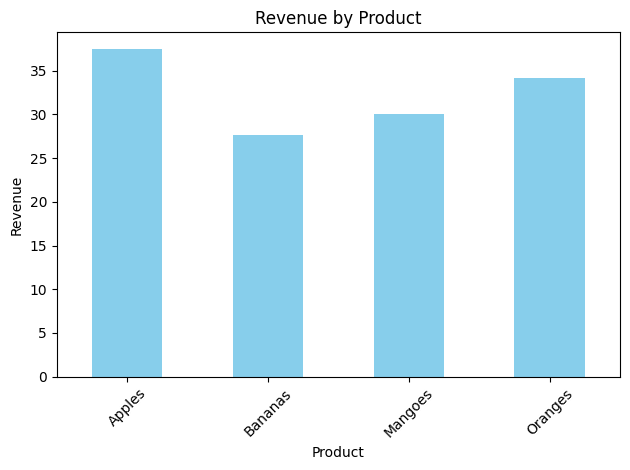

In [3]:
# Plot bar chart of revenue per product
df.plot(kind='bar', x='product', y='revenue', legend=False, color="skyblue")

plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()

# Save chart (optional)
plt.savefig("sales_chart.png")
plt.show()
